# File Setup

In [1]:
import os, shutil
from pathlib import Path

original_dataset_dir = os.path.abspath('/Users/jacob/OneDrive/Desktop/GitHub/Deep-Learning-With-Python-Exercises/dogs-vs-cats/train')

base_dir = os.path.abspath('/Users/jacob/OneDrive/Desktop/GitHub/Deep-Learning-With-Python-Exercises/cats_and_dogs_small')

os.chdir(base_dir)

# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')

# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')

# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')

# os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')

# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')

# os.mkdir(train_dogs_dir)


validation_cats_dir = os.path.join(validation_dir, 'cats')

# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# os.mkdir(validation_dogs_dir)


test_cats_dir = os.path.join(test_dir, 'cats')

# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')

# os.mkdir(test_dogs_dir)


#training cats images
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
	src = os.path.join(original_dataset_dir, fname)
	dst = os.path.join(train_cats_dir, fname)
	shutil.copyfile(src, dst)

#validation cats images
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
	src = os.path.join(original_dataset_dir, fname)
	dst = os.path.join(validation_cats_dir, fname)
	shutil.copyfile(src,dst)

#test cat images
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
	src = os.path.join(original_dataset_dir, fname)
	dst = os.path.join(test_cats_dir, fname)
	shutil.copyfile(src, dst)

#dogs training images
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
	src = os.path.join(original_dataset_dir, fname)
	dst = os.path.join(train_dogs_dir, fname)
	shutil.copyfile(src, dst)

#dogs validation images
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
	src = os.path.join(original_dataset_dir, fname)
	dst = os.path.join(validation_dogs_dir, fname)
	shutil.copyfile(src, dst)

#dogs test images
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
	src = os.path.join(original_dataset_dir, fname)
	dst = os.path.join(test_dogs_dir, fname)
	shutil.copyfile(src, dst)


# Build Model

In [2]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
model.compile(loss='binary_crossentropy', 
             optimizer=keras.optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

# Data Preprocessing

In [5]:
from tensorflow import keras

#convert images into floating point tensors

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen =  keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
#check shape of the data
for data_batch, labels_batch in train_generator:
    print('shape of data batch:', data_batch.shape)
    print('shape of label batch:', labels_batch.shape)
    break


shape of data batch: (20, 150, 150, 3)
shape of label batch: (20,)


# Fit model to data

In [7]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30, 
    validation_data = validation_generator,
    validation_steps=50
)

C:\Users\jacob\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 53s 517ms/step - loss: 0.6978 - acc: 0.4825 - val_loss: 0.6825 - val_acc: 0.5420
Epoch 2/30
100/100 [==============================] - 44s 441ms/step - loss: 0.6816 - acc: 0.5632 - val_loss: 0.6678 - val_acc: 0.5970
Epoch 3/30
100/100 [==============================] - 44s 438ms/step - loss: 0.6541 - acc: 0.6267 - val_loss: 0.6576 - val_acc: 0.6050
Epoch 4/30
100/100 [==============================] - 40s 403ms/step - loss: 0.6324 - acc: 0.6422 - val_loss: 0.6396 - val_acc: 0.6320
Epoch 5/30
100/100 [==============================] - 40s 395ms/step - loss: 0.5958 - acc: 0.6874 - val_loss: 0.6226 - val_acc: 0.6520
Epoch 6/30
100/100 [==============================] - 39s 394ms/step - loss: 0.5738 - acc: 0.7014 - val_loss: 0.5857 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 40s 401ms/step - loss: 0.5508 - acc: 0.7185 - val_loss: 0.5981 - val_acc: 0.6660
Epoch 8/30
100/100 [==============================] - 4

# Save Model

In [8]:
model.save('cats_and_dogs_small_1.h5')

# Plot loss and accuracy curves

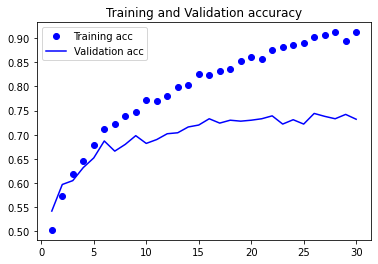

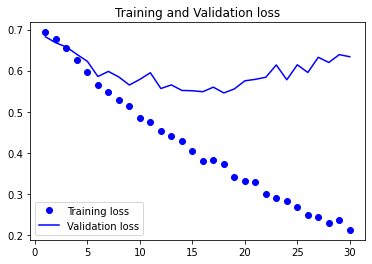

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Data Augmentation

In [10]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# Data Augmentation (Check)

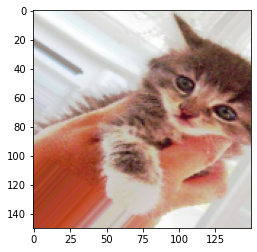

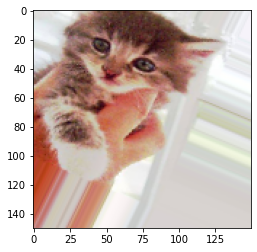

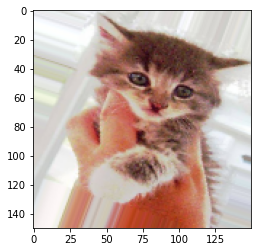

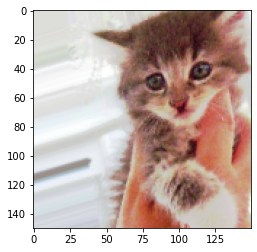

In [11]:
fnames = [os.path.join(train_cats_dir, fname) for 
         fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = keras.preprocessing.image.load_img(img_path, target_size=(150,150))

# converts to numpy array of 150 pixels by 150 pixels by depth of 3 for RGB
x = keras.preprocessing.image.img_to_array(img)

# reshape to an array of 1 image of 150 pixels by 150 pixels by depth of 3 for RGB
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(keras.preprocessing.image.array_to_img(batch[0]))
    i +=1
    if i % 4 == 0:
        break

plt.show()

# Fit model using data augmentation

In [19]:


train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size=32,
    class_mode='binary'
)


history = model.fit(
    train_generator,
#     steps_per_epoch=50,
    epochs=10,
    validation_data = validation_generator,
    validation_steps = 25
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
63/63 [==============================] - 42s 664ms/step - loss: 0.5003 - acc: 0.7520 - val_loss: 0.4804 - val_acc: 0.7663
Epoch 2/10
63/63 [==============================] - 40s 640ms/step - loss: 0.5085 - acc: 0.7545 - val_loss: 0.4735 - val_acc: 0.7688
Epoch 3/10
63/63 [==============================] - 40s 637ms/step - loss: 0.4876 - acc: 0.7590 - val_loss: 0.4822 - val_acc: 0.7663
Epoch 4/10
63/63 [==============================] - 41s 658ms/step - loss: 0.4810 - acc: 0.7730 - val_loss: 0.4658 - val_acc: 0.7763
Epoch 5/10
63/63 [==============================] - 41s 651ms/step - loss: 0.4935 - acc: 0.7635 - val_loss: 0.4896 - val_acc: 0.7713
Epoch 6/10
63/63 [==============================] - 41s 654ms/step - loss: 0.4911 - acc: 0.7660 - val_loss: 0.4706 - val_acc: 0.7700
Epoch 7/10
63/63 [==============================] - 42s 664ms/step - loss: 0.4714 - acc: 0.7765 - val_loss: 0.4557 - v

# Save Model (Again)

In [20]:
model.save('cats_and_dogs_small_2.h5')

# Plot loss and accuracy curve (Again)

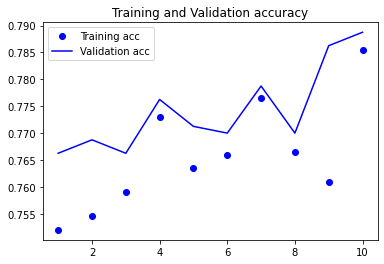

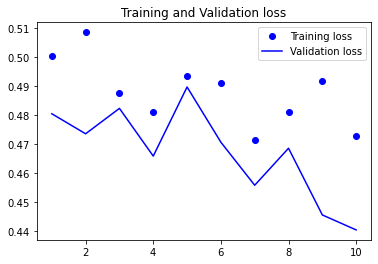

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()